In [1]:
%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import pandas as pd

# データIO

In [2]:
# Pandasで読み出すファイルの内容を見ておく
# test.csvはヘッダーなし
!cat test.csv

0.000000000000000000e+00,1.000000000000000000e+00,2.000000000000000000e+00
3.000000000000000000e+00,4.000000000000000000e+00,5.000000000000000000e+00
6.000000000000000000e+00,7.000000000000000000e+00,8.000000000000000000e+00


In [3]:
df = pd.read_csv('test.csv', header=None)
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
print(df)

     0    1    2
0  0.0  1.0  2.0
1  3.0  4.0  5.0
2  6.0  7.0  8.0


In [5]:
# test_header.csvはヘッダーあり
!cat test_header.csv

c1,c2,c3
0.000000000000000000e+00,1.000000000000000000e+00,2.000000000000000000e+00
3.000000000000000000e+00,4.000000000000000000e+00,5.000000000000000000e+00
6.000000000000000000e+00,7.000000000000000000e+00,8.000000000000000000e+00


In [7]:
df = pd.read_csv('test_header.csv')
print(df)

    c1   c2   c3
0  0.0  1.0  2.0
1  3.0  4.0  5.0
2  6.0  7.0  8.0


In [8]:
df.to_csv('output.csv', index=False)  # , header=False)

In [9]:
# 出力したoutput.csvの内容確認
!cat output.csv

c1,c2,c3
0.0,1.0,2.0
3.0,4.0,5.0
6.0,7.0,8.0


# データ操作の基本

In [10]:
ts_data = np.random.randn(20)
df = pd.DataFrame(ts_data, columns=['c1'])
print(df)

          c1
0   0.148227
1   0.353487
2  -1.087250
3   0.247096
4  -0.156840
5   0.437086
6  -0.846221
7   2.166546
8   0.334282
9  -0.377876
10  0.596387
11  2.053356
12 -0.040022
13 -0.576821
14 -0.060936
15  0.997778
16  1.775045
17 -1.337874
18  0.798311
19 -1.762909


In [11]:
# rollingで4時点ずつのデータを保持
# その後4時点ずつのデータに対してmean()で平均値を計算
move_avg = df.rolling(window=4).mean() 
print(move_avg)

          c1
0        NaN
1        NaN
2        NaN
3  -0.084610
4  -0.160877
5  -0.139977
6  -0.079720
7   0.400143
8   0.522923
9   0.319182
10  0.679835
11  0.651537
12  0.557961
13  0.508225
14  0.343894
15  0.080000
16  0.533766
17  0.343503
18  0.558315
19 -0.131857


In [12]:
# 同じ操作をapply()を使って実行
move_avg = df.rolling(window=4).apply(np.mean)
print(move_avg)

          c1
0        NaN
1        NaN
2        NaN
3  -0.084610
4  -0.160877
5  -0.139977
6  -0.079720
7   0.400143
8   0.522923
9   0.319182
10  0.679835
11  0.651537
12  0.557961
13  0.508225
14  0.343894
15  0.080000
16  0.533766
17  0.343503
18  0.558315
19 -0.131857


C:\Users\sh70k\Anaconda3\envs\tsbook\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


In [13]:
# NaNを消去してindexを初期化する
dna_move_avg = move_avg.dropna().reset_index(drop=True)
print(dna_move_avg)

          c1
0  -0.084610
1  -0.160877
2  -0.139977
3  -0.079720
4   0.400143
5   0.522923
6   0.319182
7   0.679835
8   0.651537
9   0.557961
10  0.508225
11  0.343894
12  0.080000
13  0.533766
14  0.343503
15  0.558315
16 -0.131857


In [14]:
# 1次階差をとってNaNを消去してindexを初期化する
df_diff = df.diff().dropna().reset_index(drop=True)
print(df_diff)

          c1
0   0.205259
1  -1.440736
2   1.334346
3  -0.403936
4   0.593926
5  -1.283308
6   3.012767
7  -1.832264
8  -0.712158
9   0.974263
10  1.456969
11 -2.093379
12 -0.536799
13  0.515885
14  1.058714
15  0.777266
16 -3.112919
17  2.136185
18 -2.561219


# 可視化

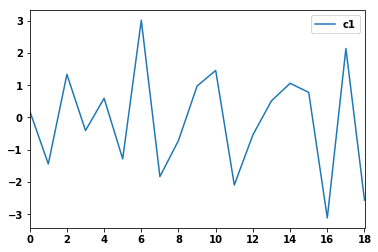

In [15]:
# 上で作成した1次階差系列の表示
df_diff.plot()